In [449]:
import altair as alt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib as plt

In [450]:
data_path = r'C:\Users\richa\Documents\lab fisica\pratica_2\data\RigolDS10k.RC0.csv'
data_read = pd.read_csv(data_path)
data_df_1 = pd.DataFrame(data_read)
data_df = data_df_1[['CH1V', 'CH2V']].apply(lambda x: x + abs(np.float64(data_df_1['CH1V'].min())))
data_df_Times = data_df_1['Time(s)'].apply(lambda x: x + abs(np.float64(data_df_1['Time(s)'].min())))
data_df['Time(s)'] = data_df_Times 


data_df.columns = ['ddp_square_wave', 'ddp_capacitor', 'Time(s)']
data_df.mean()


ddp_square_wave    2.521811
ddp_capacitor      2.286788
Time(s)            0.009990
dtype: float64

In [451]:
graph = alt.Chart(data_df)
ch1 = graph.mark_line().encode(alt.X('Time(s)'), alt.Y('ddp_square_wave')).interactive()
ch2 = graph.mark_line().encode(alt.X('Time(s)'), alt.Y('ddp_capacitor')).interactive()

ch1 + ch2

alt.LayerChart(...)

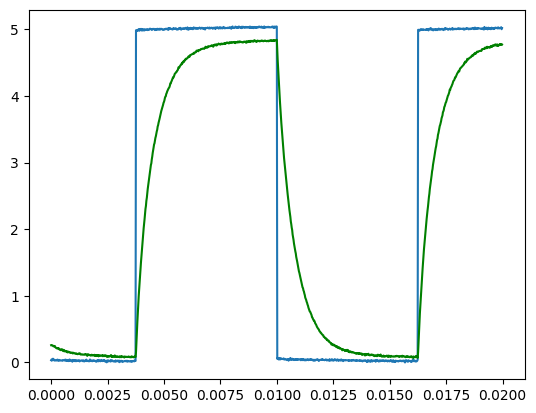

In [452]:
import matplotlib.pyplot as plt
plt.plot(data_df["Time(s)"], data_df["ddp_square_wave"], label="CH2")
plt.plot(data_df["Time(s)"], data_df["ddp_capacitor"], label="CH1", color="green")

In [453]:
def func(t, T):
    return 5*(1 - np.exp((-1/(T))*t))
x_data = data_df['Time(s)'][(data_df["Time(s)"] > 0.003745) & (data_df["Time(s)"] < 0.00999999)]
x_data_aj = x_data - x_data.min()
y_data = data_df.loc[x_data.index.tolist(), 'ddp_capacitor']
popt, pcov = curve_fit(func, x_data_aj, y_data)


def func_1(t, T):
    return 5*(np.exp(-(1/(T))*t))
x_data_1 = data_df['Time(s)'][(data_df["Time(s)"] > 0.0100010) & (data_df["Time(s)"] < 0.016239999)]
x_data_aj_1 = x_data_1 - x_data_1.min()
y_data_1 = data_df.loc[x_data_1.index.tolist(), 'ddp_capacitor']
popt_1, pcov_1 = curve_fit(func_1, x_data_aj_1, y_data_1)
print(popt, popt_1)


[0.00080075] [0.0007364]


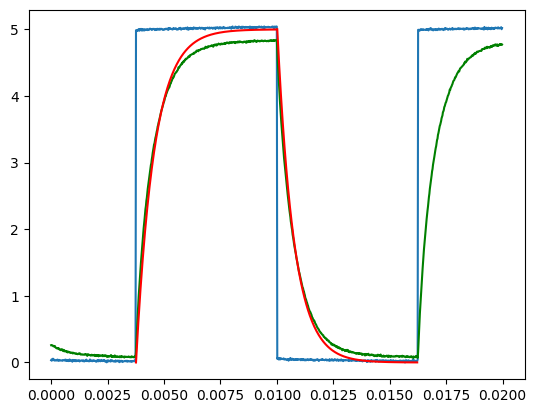

In [454]:

plt.plot(data_df["Time(s)"], data_df["ddp_square_wave"], label="CH2")
plt.plot(data_df["Time(s)"], data_df["ddp_capacitor"], label="CH1", color="green")
plt.plot(x_data, func(x_data_aj, *popt), color='red')
plt.plot(x_data_1, func_1(x_data_aj_1, *popt_1), color='red')



aqui se inicia a anlise de dados do segundo circuito

In [455]:
data_path = r'C:\Users\richa\Documents\lab fisica\pratica_2\data\RigolDS20k.RC0.csv'
data_read = pd.read_csv(data_path)
data_df_1 = pd.DataFrame(data_read)
data_df = data_df_1[['CH1V', 'CH2V']].apply(lambda x: x + np.float64(2.53))
data_df_Times = data_df_1['Time(s)'].apply(lambda x: x + abs(np.float64(data_df_1['Time(s)'].min())))
data_df['Time(s)'] = data_df_Times 


data_df.columns = ['ddp_square_wave', 'ddp_capacitor', 'Time(s)']
data_df

,ddp_square_wave,ddp_capacitor,Time(s)
0,5.025467,4.696267,0.00000
1,0.021067,4.515733,0.00005
2,0.028533,4.341867,0.00010
3,0.028533,4.175467,0.00015
4,0.029600,4.023733,0.00020
...,...,...,...
995,5.019200,4.690133,0.04975
996,5.009600,4.694000,0.04980
997,5.017467,4.711600,0.04985
998,5.011867,4.702000,0.04990


In [456]:
graph = alt.Chart(data_df)
ch1 = graph.mark_line().encode(alt.X('Time(s)'), alt.Y('ddp_square_wave')).interactive()
ch2 = graph.mark_line().encode(alt.X('Time(s)'), alt.Y('ddp_capacitor')).interactive()

ch1 + ch2

alt.LayerChart(...)

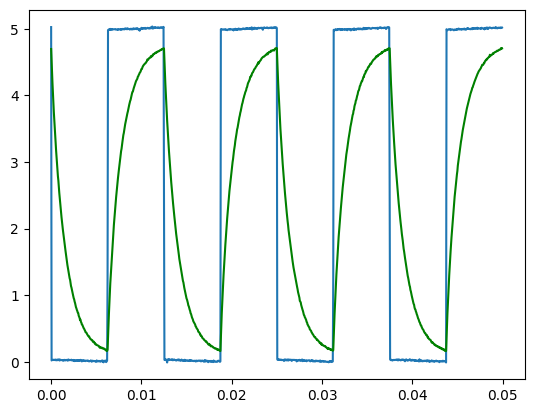

In [457]:
import matplotlib.pyplot as plt
plt.plot(data_df["Time(s)"], data_df["ddp_square_wave"], label="CH2")
plt.plot(data_df["Time(s)"], data_df["ddp_capacitor"], label="CH1", color="green")

In [458]:
def func(t, T):
    return 5*(1 - np.exp((-1/(10000*T))*t))
x_data = data_df['Time(s)'][(data_df["Time(s)"] > 0.018765) & (data_df["Time(s)"] < 0.024950)]
x_data_aj = x_data - x_data.min()
y_data = data_df.loc[x_data.index.tolist(), 'ddp_capacitor']
popt, pcov = curve_fit(func, x_data_aj, y_data)


def func_1(t, T):
    return 5*(np.exp(-(1/(10000*T))*t))
x_data_1 = data_df['Time(s)'][(data_df["Time(s)"] > 0.025020) & (data_df["Time(s)"] < 0.031200)]
x_data_aj_1 = x_data_1 - x_data_1.min()
y_data_1 = data_df.loc[x_data_1.index.tolist(), 'ddp_capacitor']
popt_1, pcov_1 = curve_fit(func_1, x_data_aj_1, y_data_1)


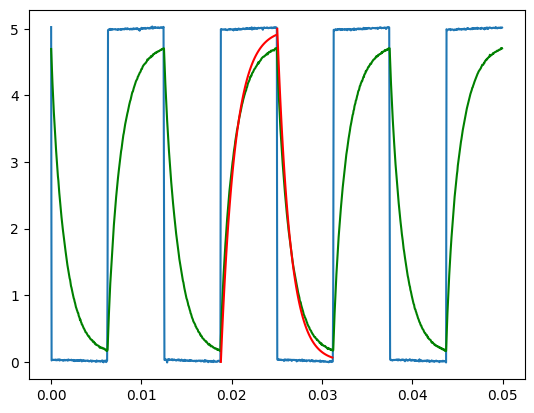

In [460]:
#0.025012    0.031200
plt.plot(data_df["Time(s)"], data_df["ddp_square_wave"], label="CH2")
plt.plot(data_df["Time(s)"], data_df["ddp_capacitor"], label="CH1", color="green")
plt.plot(x_data, func(x_data_aj, *popt), color='red')
plt.plot(x_data_1, func_1(x_data_aj_1, *popt_1), color='red')
